In [3]:
#1

In [6]:
import pandas as pd
data=pd.read_csv('finds.csv')
data

,citations,size,inlibrary,prize,editions,buy
0,some,small,no,affordable,many,no
1,many,big,no,expensive,one,yes
2,some,big,always,expensive,few,no
3,many,medium,no,expensive,many,yes
4,many,medium,no,affordable,many,yes


In [7]:
k=len(data)
p=len(data.columns)-1

In [8]:
h=[None]*p
print("h0:",h)
for i in range(k):
    if data.loc[i]['buy']=='yes':
        for j in range(p):
            if h[j]==None:
                h[j]=data.loc[i][j]
            elif h[j]!=data.loc[i][j]:
                h[j]='?'
    print('h'+str(i+1),':',h)


h0: [None, None, None, None, None]
h1 : [None, None, None, None, None]
h2 : ['many', 'big', 'no', 'expensive', 'one']
h3 : ['many', 'big', 'no', 'expensive', 'one']
h4 : ['many', '?', 'no', 'expensive', '?']
h5 : ['many', '?', 'no', '?', '?']


In [6]:
#2

In [4]:
import pandas as pd
import numpy as np
fs=pd.read_csv('candidate.csv')
fs

,sky,airtemp,humidity,wind,water,forecast,enjoysport
0,sunny,warm,normal,strong,warm,same,yes
1,sunny,warm,high,strong,warm,same,yes
2,rainy,cold,high,strong,warm,change,no
3,sunny,warm,high,strong,cool,change,yes


In [18]:
r=len(fs)
c=len(fs.columns)-1
print(r,c)

4 6


In [19]:
s=[None]*c
g_=['?']*c
g=[g_]
print('s0 :',s)
print('g0 :',g)



def removeFrom(g,d):
    i=0
    while i<len(g):
        k=g[i]
        f=0
        for j in range(c):
            if k[j]!='?':
                if k[j]!=d[j]:
                    g.remove(k)
                    f=1
                    break
        if f==0: i+=1
            
            
def generalize(s,d):
     for j in range(c):
        if s[j]==None:
            s[j]=d[j]
        elif s[j]!=d[j]:
            s[j]='?'

            
def inconsistent(k,d):
    for j in range(c):
        if k[j]!='?':
            if k[j]!=d[j]:
                return 0
    return 1


def specialize(g,d):
    i=0
    m=[]
    while i<len(g):
        k=g[i]
        f=0
        if inconsistent(k,d):
            for j in range(c):
                p=k.copy()
                if p[j]=='?' and s[j]!='?' and  s[j]!=d[j]:
                    p[j]=s[j]
                    m.append(p)
            f=1
            g.remove(k)
        if f==0: i+=1
    g.extend(m)
    g=np.unique(g,axis=0)
    

for i in range(r):
    if fs.loc[i]['enjoysport']=='yes':
        removeFrom(g,fs.loc[i])
        generalize(s,fs.loc[i])
    else:
        specialize(g,fs.loc[i])

    print('s'+str(i+1),':',s)
    print('g'+str(i+1),':',g)

print('Learned Version Space Combinations:')

v=[]
for k in g:
    f=0
    p=[]
    for j in range(c):
        if k[j]!='?' and k[j]==s[j]:
            p.append(j)
        elif k[j]!='?' and k[j]!=s[j]:
            f=1
            break

    if f==0:
        for j in range(c):
            q=k.copy()
            if j not in p and s[j]!='?':
                q[j]=s[j]
                v.append(q)

v=np.unique(v,axis=0)
print(v)




s0 : [None, None, None, None, None, None]
g0 : [['?', '?', '?', '?', '?', '?']]
s1 : ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
g1 : [['?', '?', '?', '?', '?', '?']]
s2 : ['sunny', 'warm', '?', 'strong', 'warm', 'same']
g2 : [['?', '?', '?', '?', '?', '?']]
s3 : ['sunny', 'warm', '?', 'strong', 'warm', 'same']
g3 : [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'same']]
s4 : ['sunny', 'warm', '?', 'strong', '?', '?']
g4 : [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?']]
Learned Version Space Combinations:
[['?' 'warm' '?' 'strong' '?' '?']
 ['sunny' '?' '?' 'strong' '?' '?']
 ['sunny' 'warm' '?' '?' '?' '?']]


In [20]:
#3

In [35]:
import pandas as pd
import numpy as np
t=pd.read_csv('playtennis.csv')
t

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [36]:
from sklearn.model_selection import train_test_split
x=t.drop('play',axis=1)
y=t.play
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=15)

In [37]:
c=len(x_train)
print('No. of rows in x_train =',c)
q=len(x_test)
print('No. of rows in x_test =',q)
k=len(x_train.columns)

No. of rows in x_train = 8
No. of rows in x_test = 6


In [38]:
x_train.index=range(c)
x_test.index=range(q)
y_train.index=range(c)
y_test.index=range(q)
print('Train data')
print(x_train)
print('\nTest data')
print(x_test)

Train data
    outlook  temp humidity    wind
0  Overcast  Mild     High  Strong
1      Rain  Mild     High    Weak
2     Sunny  Mild   Normal  Strong
3     Sunny   Hot     High    Weak
4     Sunny  Mild     High    Weak
5  Overcast   Hot   Normal    Weak
6      Rain  Cool   Normal  Strong
7     Sunny  Cool   Normal    Weak

Test data
    outlook  temp humidity    wind
0      Rain  Mild     High  Strong
1  Overcast   Hot     High    Weak
2      Rain  Mild   Normal    Weak
3      Rain  Cool   Normal    Weak
4     Sunny   Hot     High  Strong
5  Overcast  Cool   Normal  Strong


In [39]:
c_n=len(y_train[y_train=='No'])
p_n=c_n/c
print('Probability of Negative class = ',p_n)
c_p=len(y_train[y_train=='Yes'])
p_p=c_p/c
print('Probability of Positive class = ',p_p)

Probability of Negative class =  0.375
Probability of Positive class =  0.625


In [40]:
d_p={}
d_n={}
x_train['play']=y_train
col=x_train.columns
for i in range(k):
    l=x_train[col[i]].unique()
    for j in l:
        d_p[j]=len(x_train[(x_train[col[i]]==j) & (x_train.play=='Yes')])/c_p
        d_n[j]=len(x_train[(x_train[col[i]]==j) & (x_train.play=='No')])/c_n
            
        


In [41]:
res=[]
p,n=1,1
for i in range(q):
    f=x_test.loc[i]
    for j in range(k):
        p=p*d_p[f[j]]
        n=n*d_n[f[j]]
    p=p*p_p
    n=n*p_n
    if p>=n:
        res.append('Yes')
    else:
        res.append('No')

In [42]:
print('Predicted class labels =',res)
print('Actual class labels =\n',y_test)

Predicted class labels = ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']
Actual class labels =
 0     No
1    Yes
2    Yes
3    Yes
4     No
5    Yes
Name: play, dtype: object


In [44]:
acc=0
for i in range(q):
    if res[i]==y_test[i]:
        acc=acc+1
print('Accuracy = %.3f'%(acc/q))

Accuracy = 0.667


In [45]:
#4

In [56]:
import pandas as pd
import numpy as np
msg=pd.read_csv('text_classification.csv',names=['message','label'])
msg

,message,label
0,I love this sandwich,pos
1,this is an amazing place,pos
2,I feel very good about these beers,pos
3,this is my best work,pos
4,what an awesome view,pos
5,I do not like this restaurant,neg
6,I am tired of this stuff,neg
7,I can't deal with this,neg
8,he is my sworn enemy,neg
9,my boss is horrible,neg


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [58]:
msg['labelnum']=msg.label.map({'pos':1,'neg':0})
x=msg.message
y=msg.labelnum

In [59]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)
print("total no of training data :",ytrain.shape)
print("total no of test data :",ytest.shape)

total no of training data : (13,)
total no of test data : (5,)


In [60]:
cv=CountVectorizer()
xtrain_dtm=cv.fit_transform(xtrain)
xtest_dtm=cv.transform(xtest)
print("the words or tokens present in the text are :")
print(cv.get_feature_names_out())
df=pd.DataFrame(xtrain_dtm.toarray(),columns=cv.get_feature_names_out())


clf=MultinomialNB().fit(xtrain_dtm,ytrain)
predicted=clf.predict(xtest_dtm)



print("Accuracy of the classifier is :")
print(metrics.accuracy_score(ytest,predicted))
print("confusion matrix is :")
print(metrics.confusion_matrix(ytest,predicted))
print("the value of precision is :")
print(metrics.precision_score(ytest,predicted))
print("the value of the recall is :")
print(metrics.recall_score(ytest,predicted))

the words or tokens present in the text are :
['am' 'amazing' 'an' 'and' 'awesome' 'bad' 'best' 'boss' 'can' 'deal' 'do'
 'donot' 'enemy' 'great' 'he' 'holiday' 'horrible' 'is' 'juice' 'like'
 'locality' 'love' 'my' 'not' 'of' 'place' 'restaurant' 'sandwich' 'sick'
 'stay' 'sworn' 'taste' 'that' 'the' 'this' 'tired' 'to' 'view' 'what'
 'with' 'work']
Accuracy of the classifier is :
0.6
confusion matrix is :
[[2 0]
 [2 1]]
the value of precision is :
1.0
the value of the recall is :
0.3333333333333333


Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


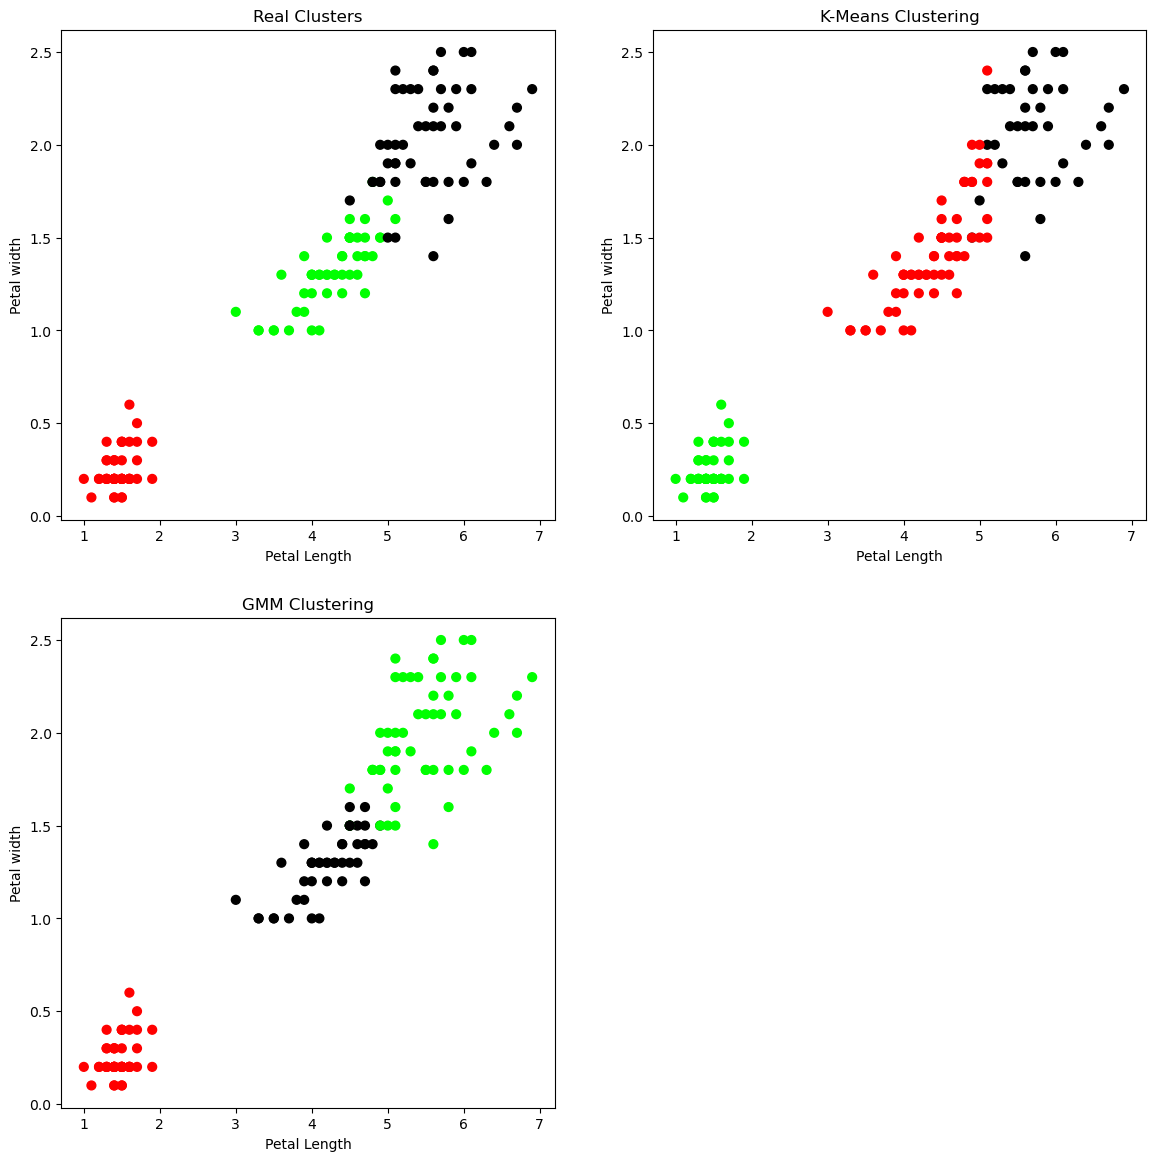

In [119]:
#8import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_width','Petal_Length','Petal_width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
# Build the K Means Model
model = KMeans (n_clusters=3)
model.fit(X)
plt.figure(figsize=(14,14))
colormap = np.array(['red', 'lime', 'black'])
# Plot the original Classifications using Petal features
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_width, c=colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_width, c=colormap[model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
from sklearn import preprocessing
# transform your data such that its distribution will have a # mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y=gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter (X.Petal_Length, X.Petal_width, c=colormap[gmm_y], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
#Load dataset
iris=datasets.load_iris()
print("Iris Data set loaded...")
# Split the data into train and test samples
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
print("Dataset is split into training and testing...")
print("size of trainng data and its label",x_train.shape,y_train.shape)
print("Size of trainng data and its label",x_test.shape, y_test.shape)
# Prints Label no. and their names
for i in range(len(iris.target_names)):
      print("Label", i, "-",str(iris.target_names[i]))
      # Create object of KNN classifier
      classifier = KNeighborsClassifier(n_neighbors=1)
#Perform Training
classifier.fit(x_train, y_train)
# Perform testing
y_pred=classifier.predict(x_test)
# Display the results
print("Results of Classification using K-nn with K=1")
for r in range(0,len(x_test)):
      print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r]), "Predicted-label:", str(y_pred[r]))
      print("Classification Accuracy:", classifier.score(x_test,y_test));
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Metrics')
print(classification_report(y_test,y_pred))


Iris Data set loaded...
Dataset is split into training and testing...
size of trainng data and its label (135, 4) (135,)
Size of trainng data and its label (15, 4) (15,)
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=1
 Sample: [5.7 2.9 4.2 1.3]  Actual-label: 1 Predicted-label: 1
Classification Accuracy: 1.0
 Sample: [7.  3.2 4.7 1.4]  Actual-label: 1 Predicted-label: 1
Classification Accuracy: 1.0
 Sample: [6.3 2.3 4.4 1.3]  Actual-label: 1 Predicted-label: 1
Classification Accuracy: 1.0
 Sample: [5.  3.4 1.5 0.2]  Actual-label: 0 Predicted-label: 0
Classification Accuracy: 1.0
 Sample: [7.3 2.9 6.3 1.8]  Actual-label: 2 Predicted-label: 2
Classification Accuracy: 1.0
 Sample: [5.  3.5 1.6 0.6]  Actual-label: 0 Predicted-label: 0
Classification Accuracy: 1.0
 Sample: [7.4 2.8 6.1 1.9]  Actual-label: 2 Predicted-label: 2
Classification Accuracy: 1.0
 Sample: [6.7 3.3 5.7 2.5]  Actual-label: 2 Predicted-label: 2
Classification Accu

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [111]:
#10

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.metrics import classification_report,confusion_matrix

In [113]:
iris=datasets.load_iris()
print("Iris Data set loaded....")

Iris Data set loaded....


In [114]:
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.1)
print("Dataset is split into training and testing.... ")
print("Size of training data and its label",x_train.shape,y_train.shape)
print("Size of training data and its label",x_test.shape,y_test.shape)


Dataset is split into training and testing.... 
Size of training data and its label (135, 4) (135,)
Size of training data and its label (15, 4) (15,)


In [115]:
for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))
classifier=KNeighborsClassifier(n_neighbors=1)


Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica


In [116]:
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [117]:
print("Results of Classification using K-nn with K=1")
for r in range(0,len(x_test)):
    print("Sample:",str(x_test[r]), " Actual-label:", str(y_test[r]), "Predicted-label:",str(y_pred[r]))
print("Classification Accuracy :", classifier.score(x_test,y_test));


Results of Classification using K-nn with K=1
Sample: [5.  2.  3.5 1. ]  Actual-label: 1 Predicted-label: 1
Sample: [6.7 3.1 4.4 1.4]  Actual-label: 1 Predicted-label: 1
Sample: [5.  3.4 1.5 0.2]  Actual-label: 0 Predicted-label: 0
Sample: [7.7 2.6 6.9 2.3]  Actual-label: 2 Predicted-label: 2
Sample: [4.4 3.  1.3 0.2]  Actual-label: 0 Predicted-label: 0
Sample: [7.6 3.  6.6 2.1]  Actual-label: 2 Predicted-label: 2
Sample: [6.1 2.8 4.7 1.2]  Actual-label: 1 Predicted-label: 1
Sample: [5.8 4.  1.2 0.2]  Actual-label: 0 Predicted-label: 0
Sample: [4.9 3.6 1.4 0.1]  Actual-label: 0 Predicted-label: 0
Sample: [5.3 3.7 1.5 0.2]  Actual-label: 0 Predicted-label: 0
Sample: [4.6 3.6 1.  0.2]  Actual-label: 0 Predicted-label: 0
Sample: [5.1 3.7 1.5 0.4]  Actual-label: 0 Predicted-label: 0
Sample: [5.4 3.  4.5 1.5]  Actual-label: 1 Predicted-label: 1
Sample: [4.8 3.1 1.6 0.2]  Actual-label: 0 Predicted-label: 0
Sample: [6.5 2.8 4.6 1.5]  Actual-label: 1 Predicted-label: 1
Classification Accuracy 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [118]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Metrics')
print(classification_report(y_test,y_pred))

Confusion Matrix
[[8 0 0]
 [0 5 0]
 [0 0 2]]
Accuracy Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
def kernel(point,xmat,k):
    m,n=np.shape(xmat)
    weights=np.mat(np.eye((m)))
    for j in range(m):
        diff=point-X[j]
        weights[j,j]=np.exp(diff*diff.T / (-2.0* k**2))
    return weights

In [107]:
def localWeight(point,xmat,ymat,k):
    wt=kernel(point,xmat,k)
    W=(X.T * (wt*X)).I * (X.T * wt *ymat.T)
    return W

In [108]:
def localWeightRegression(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i] * localWeight(xmat[i],xmat,ymat,k)
    return ypred

In [109]:
data=pd.read_csv('10-dataset.csv')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


(244, 2)


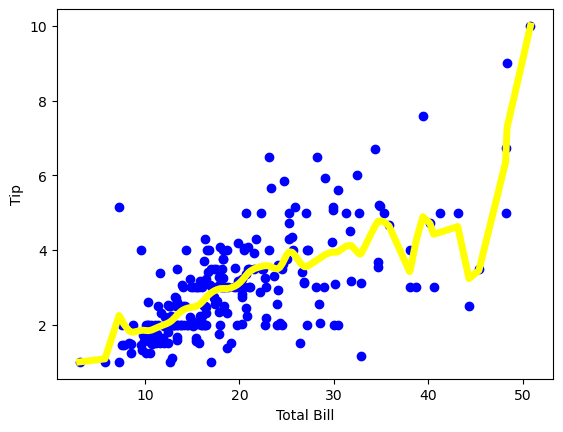

In [110]:
colA=np.array(data.total_bill)
colB=np.array(data.tip)
mcolA=np.mat(colA)
mcolB=np.mat(colB)
m=np.shape(mcolB)[1]
one=np.ones((1,m),dtype=int)
X=np.hstack((one.T,mcolA.T))
print(X.shape)
ypred=localWeightRegression(X,mcolB,0.8)
xsort=X.copy()
xsort.sort(axis=0)
plt.scatter(colA,colB,color='blue')
plt.plot(xsort[:,1],ypred[X[:,1].argsort(0)],color='yellow',linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()